In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [85]:
data = pd.read_csv(r"C:\Users\nijat\Desktop\PYTHON - KURS\Ders 16\application.csv")
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,App_entry
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0


In [3]:
data.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,App_entry
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,1.00000


In [4]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
App_entry                     int64
dtype: object

In [5]:
data = data.drop(data[['Ad Topic Line', 'City']],axis=1)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry
0,68.95,35,61833.90,256.09,0,Tunisia,0
1,80.23,31,68441.85,193.77,1,Nauru,0
2,69.47,26,59785.94,236.50,0,San Marino,0
3,74.15,29,54806.18,245.89,1,Italy,0
4,68.37,35,73889.99,225.58,0,Iceland,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,1
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,1,Mongolia,1
998,55.55,19,41920.79,187.95,0,Guatemala,0


In [6]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Country                     0
App_entry                   0
dtype: int64

In [7]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Country', 'App_entry'],
      dtype='object')

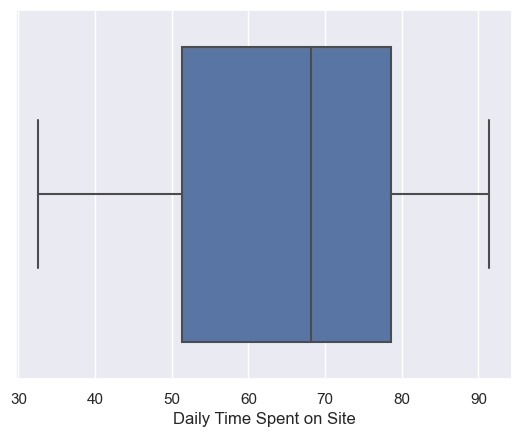

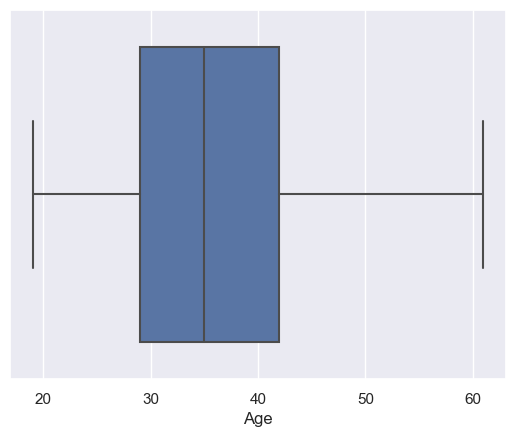

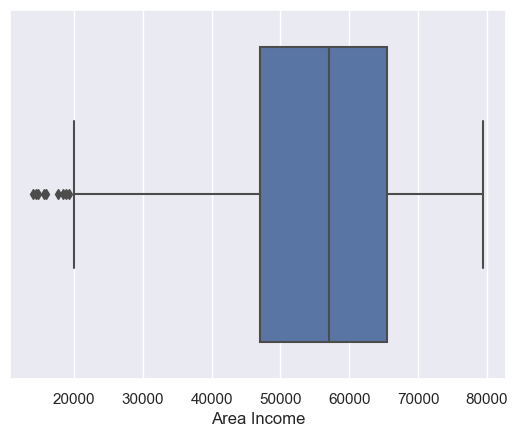

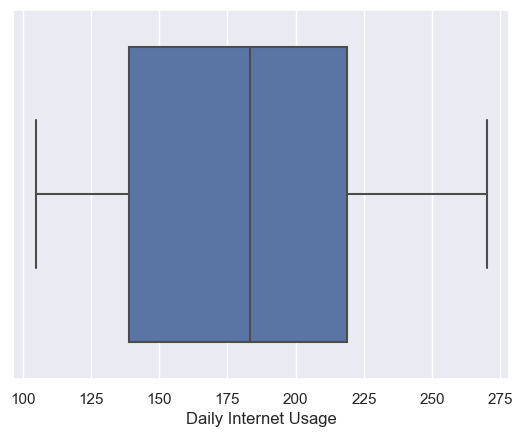

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

for i in data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [9]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

Lower = q1 - 1.5*IQR
Upper = q3 + 1.5*IQR

In [10]:
Lower

Daily Time Spent on Site       10.57875
Age                             9.50000
Area Income                 19373.55375
Daily Internet Usage           18.88625
Male                           -1.50000
App_entry                      -1.50000
dtype: float64

In [11]:
Upper

Daily Time Spent on Site      119.32875
Age                            61.50000
Area Income                 93128.88375
Daily Internet Usage          338.73625
Male                            2.50000
App_entry                       2.50000
dtype: float64

In [12]:
for i in data[['Area Income']]:
    data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])

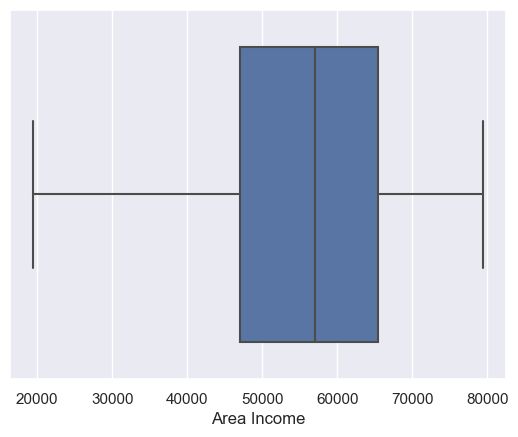

In [13]:
for i in data[['Area Income']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [14]:
data.describe(include = "all")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,NaN,237,NaN
top,NaN,NaN,NaN,NaN,NaN,France,NaN
freq,NaN,NaN,NaN,NaN,NaN,9,NaN
mean,65.000200,36.009000,55025.321364,180.000100,0.481000,NaN,0.50000
std,15.853615,8.785562,13343.228619,43.902339,0.499889,NaN,0.50025
min,32.600000,19.000000,19373.553750,104.780000,0.000000,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,NaN,1.00000


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Daily Time Spent on Site', 'Age']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,6.951865,Daily Time Spent on Site
1,6.951865,Age


In [16]:
def change(value):
    change= ''
    if(value > 80):
        change = 'high'
    elif(value < 80 and value > 40):
        change = 'middle'
    else:
        change  = 'less'
    return change

data['DTSOS'] = data['Daily Time Spent on Site'].apply(change)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS
0,68.95,35,61833.90,256.09,0,Tunisia,0,middle
1,80.23,31,68441.85,193.77,1,Nauru,0,high
2,69.47,26,59785.94,236.50,0,San Marino,0,middle
3,74.15,29,54806.18,245.89,1,Italy,0,middle
4,68.37,35,73889.99,225.58,0,Iceland,0,middle
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,1,middle
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,1,middle
997,51.63,51,42415.72,120.37,1,Mongolia,1,middle
998,55.55,19,41920.79,187.95,0,Guatemala,0,middle


In [17]:
data.DTSOS.value_counts()

middle    715
high      200
less       85
Name: DTSOS, dtype: int64

In [18]:
woe_df = data.groupby('DTSOS')['App_entry'].mean()

In [19]:
woe_df = pd.DataFrame(woe_df)
woe_df

,App_entry
DTSOS,
high,0.080000
less,1.000000
middle,0.558042


In [20]:
woe_df['good'] = woe_df['App_entry'] 

In [21]:
woe_df['bad'] = 1 - woe_df['good']

In [22]:
woe_df

,App_entry,good,bad
DTSOS,,,
high,0.080000,0.080000,0.920000
less,1.000000,1.000000,0.000000
middle,0.558042,0.558042,0.441958


In [23]:
woe_df['bad'] = np.where(woe_df['bad']==0,0.00001,woe_df['bad'])

In [24]:
woe_df['WOE'] = np.log(woe_df['good']/woe_df['bad'])

woe_df

,App_entry,good,bad,WOE
DTSOS,,,,
high,0.080000,0.080000,0.920000,-2.442347
less,1.000000,1.000000,0.000010,11.512925
middle,0.558042,0.558042,0.441958,0.233219


In [25]:
woe_df['IV'] =(woe_df['good']-woe_df['bad']) * woe_df['WOE']

woe_df

,App_entry,good,bad,WOE,IV
DTSOS,,,,,
high,0.080000,0.080000,0.920000,-2.442347,2.051572
less,1.000000,1.000000,0.000010,11.512925,11.512810
middle,0.558042,0.558042,0.441958,0.233219,0.027073


In [26]:
data.loc[:,'DTSOS_woe'] = data['DTSOS'].map(woe_df['WOE'])

data.loc[:,'DTSOS_IV'] = data['DTSOS'].map(woe_df['IV'])

data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS,DTSOS_woe,DTSOS_IV
0,68.95,35,61833.90,256.09,0,Tunisia,0,middle,0.233219,0.027073
1,80.23,31,68441.85,193.77,1,Nauru,0,high,-2.442347,2.051572
2,69.47,26,59785.94,236.50,0,San Marino,0,middle,0.233219,0.027073
3,74.15,29,54806.18,245.89,1,Italy,0,middle,0.233219,0.027073
4,68.37,35,73889.99,225.58,0,Iceland,0,middle,0.233219,0.027073
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,1,middle,0.233219,0.027073
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,1,middle,0.233219,0.027073
997,51.63,51,42415.72,120.37,1,Mongolia,1,middle,0.233219,0.027073
998,55.55,19,41920.79,187.95,0,Guatemala,0,middle,0.233219,0.027073


In [27]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,App_entry,DTSOS_woe,DTSOS_IV
Daily Time Spent on Site,1.000000,-0.331513,0.312198,0.518658,-0.018951,-0.748117,-0.676136,-0.389889
Age,-0.331513,1.000000,-0.182403,-0.367209,-0.021044,0.492531,0.178701,0.139875
Area Income,0.312198,-0.182403,1.000000,0.339280,0.002524,-0.476905,-0.177654,-0.152957
Daily Internet Usage,0.518658,-0.367209,0.339280,1.000000,0.028012,-0.786539,-0.169540,-0.022595
Male,-0.018951,-0.021044,0.002524,0.028012,1.000000,-0.038027,0.038175,0.032878
App_entry,-0.748117,0.492531,-0.476905,-0.786539,-0.038027,1.000000,0.405403,0.199925
DTSOS_woe,-0.676136,0.178701,-0.177654,-0.169540,0.038175,0.405403,1.000000,0.845310
DTSOS_IV,-0.389889,0.139875,-0.152957,-0.022595,0.032878,0.199925,0.845310,1.000000


In [28]:
ranges = [18, 30, 45, 88] 
labels_added = ['young', 'adult', 'senior']


data['age_labels'] = pd.cut(data['Age'], 
                                  bins=ranges, 
                                  labels=labels_added)
data.head(15)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS,DTSOS_woe,DTSOS_IV,age_labels
0,68.95,35,61833.90,256.09,0,Tunisia,0,middle,0.233219,0.027073,adult
1,80.23,31,68441.85,193.77,1,Nauru,0,high,-2.442347,2.051572,adult
2,69.47,26,59785.94,236.50,0,San Marino,0,middle,0.233219,0.027073,young
3,74.15,29,54806.18,245.89,1,Italy,0,middle,0.233219,0.027073,young
4,68.37,35,73889.99,225.58,0,Iceland,0,middle,0.233219,0.027073,adult
5,59.99,23,59761.56,226.74,1,Norway,0,middle,0.233219,0.027073,young
6,88.91,33,53852.85,208.36,0,Myanmar,0,high,-2.442347,2.051572,adult
7,66.00,48,24593.33,131.76,1,Australia,1,middle,0.233219,0.027073,senior
8,74.53,30,68862.00,221.51,1,Grenada,0,middle,0.233219,0.027073,young
9,69.88,20,55642.32,183.82,1,Ghana,0,middle,0.233219,0.027073,young


In [29]:
woe_df = data.groupby('age_labels').agg({'App_entry':np.mean})

In [30]:
woe_df = pd.DataFrame(woe_df)
woe_df

,App_entry
age_labels,
young,0.267327
adult,0.511111
senior,0.910828


In [31]:
woe_df['good'] = woe_df['App_entry']

In [32]:
woe_df['bad'] = 1 - woe_df['good']

In [33]:
woe_df

,App_entry,good,bad
age_labels,,,
young,0.267327,0.267327,0.732673
adult,0.511111,0.511111,0.488889
senior,0.910828,0.910828,0.089172


In [34]:
woe_df['bad'] = np.where(woe_df['bad']==0,0.00001,woe_df['bad'])

In [35]:
woe_df['WOE'] = np.log(woe_df['good']/woe_df['bad'])

woe_df

,App_entry,good,bad,WOE
age_labels,,,,
young,0.267327,0.267327,0.732673,-1.008228
adult,0.511111,0.511111,0.488889,0.044452
senior,0.910828,0.910828,0.089172,2.323787


In [36]:
data.loc[:,'age_woe'] = data['age_labels'].map(woe_df['WOE'])

In [37]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS,DTSOS_woe,DTSOS_IV,age_labels,age_woe
0,68.95,35,61833.90,256.09,0,Tunisia,0,middle,0.233219,0.027073,adult,0.044452
1,80.23,31,68441.85,193.77,1,Nauru,0,high,-2.442347,2.051572,adult,0.044452
2,69.47,26,59785.94,236.50,0,San Marino,0,middle,0.233219,0.027073,young,-1.008228
3,74.15,29,54806.18,245.89,1,Italy,0,middle,0.233219,0.027073,young,-1.008228
4,68.37,35,73889.99,225.58,0,Iceland,0,middle,0.233219,0.027073,adult,0.044452
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,1,middle,0.233219,0.027073,young,-1.008228
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,1,middle,0.233219,0.027073,adult,0.044452
997,51.63,51,42415.72,120.37,1,Mongolia,1,middle,0.233219,0.027073,senior,2.323787
998,55.55,19,41920.79,187.95,0,Guatemala,0,middle,0.233219,0.027073,young,-1.008228


In [38]:
data.dtypes

Daily Time Spent on Site     float64
Age                            int64
Area Income                  float64
Daily Internet Usage         float64
Male                           int64
Country                       object
App_entry                      int64
DTSOS                         object
DTSOS_woe                    float64
DTSOS_IV                     float64
age_labels                  category
age_woe                     category
dtype: object

In [39]:
data.describe(include = 'all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS,DTSOS_woe,DTSOS_IV,age_labels,age_woe
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,237,NaN,3,NaN,NaN,3,3.000000
top,NaN,NaN,NaN,NaN,NaN,France,NaN,middle,NaN,NaN,adult,0.044452
freq,NaN,NaN,NaN,NaN,NaN,9,NaN,715,NaN,NaN,540,540.000000
mean,65.000200,36.009000,55025.321364,180.000100,0.481000,NaN,0.50000,NaN,0.656881,1.408260,NaN,NaN
std,15.853615,8.785562,13343.228619,43.902339,0.499889,NaN,0.50025,NaN,3.475489,3.183639,NaN,NaN
min,32.600000,19.000000,19373.553750,104.780000,0.000000,NaN,0.00000,NaN,-2.442347,0.027073,NaN,NaN
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,NaN,0.00000,NaN,0.233219,0.027073,NaN,NaN
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,NaN,0.50000,NaN,0.233219,0.027073,NaN,NaN
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,NaN,1.00000,NaN,0.233219,2.051572,NaN,NaN


In [40]:
ranges = [0, 30000, 60000, 90000] 
labels_added = ['low', 'middle', 'high']


data['income_labels'] = pd.cut(data['Area Income'], 
                                  bins=ranges, 
                                  labels=labels_added)
data.head(15)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS,DTSOS_woe,DTSOS_IV,age_labels,age_woe,income_labels
0,68.95,35,61833.90,256.09,0,Tunisia,0,middle,0.233219,0.027073,adult,0.044452,high
1,80.23,31,68441.85,193.77,1,Nauru,0,high,-2.442347,2.051572,adult,0.044452,high
2,69.47,26,59785.94,236.50,0,San Marino,0,middle,0.233219,0.027073,young,-1.008228,middle
3,74.15,29,54806.18,245.89,1,Italy,0,middle,0.233219,0.027073,young,-1.008228,middle
4,68.37,35,73889.99,225.58,0,Iceland,0,middle,0.233219,0.027073,adult,0.044452,high
5,59.99,23,59761.56,226.74,1,Norway,0,middle,0.233219,0.027073,young,-1.008228,middle
6,88.91,33,53852.85,208.36,0,Myanmar,0,high,-2.442347,2.051572,adult,0.044452,middle
7,66.00,48,24593.33,131.76,1,Australia,1,middle,0.233219,0.027073,senior,2.323787,low
8,74.53,30,68862.00,221.51,1,Grenada,0,middle,0.233219,0.027073,young,-1.008228,high
9,69.88,20,55642.32,183.82,1,Ghana,0,middle,0.233219,0.027073,young,-1.008228,middle


In [41]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Country                     0
App_entry                   0
DTSOS                       0
DTSOS_woe                   0
DTSOS_IV                    0
age_labels                  0
age_woe                     0
income_labels               0
dtype: int64

In [42]:
woe_df = data.groupby('income_labels').agg({'App_entry':np.mean})

In [43]:
woe_df = pd.DataFrame(woe_df)
woe_df

,App_entry
income_labels,
low,1.00000
middle,0.62380
high,0.27619


In [44]:
woe_df['good'] = woe_df['App_entry'] 

In [45]:
woe_df['bad'] = 1 - woe_df['good']

In [46]:
woe_df

,App_entry,good,bad
income_labels,,,
low,1.00000,1.00000,0.00000
middle,0.62380,0.62380,0.37620
high,0.27619,0.27619,0.72381


In [47]:
woe_df['bad'] = np.where(woe_df['bad']==0,0.00001,woe_df['bad'])

In [48]:
woe_df['WOE'] = np.log(woe_df['good']/woe_df['bad'])

woe_df

,App_entry,good,bad,WOE
income_labels,,,,
low,1.00000,1.00000,0.00001,11.512925
middle,0.62380,0.62380,0.37620,0.505711
high,0.27619,0.27619,0.72381,-0.963438


In [49]:
data.loc[:,'income_woe'] = data['income_labels'].map(woe_df['WOE'])

In [50]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS,DTSOS_woe,DTSOS_IV,age_labels,age_woe,income_labels,income_woe
0,68.95,35,61833.90,256.09,0,Tunisia,0,middle,0.233219,0.027073,adult,0.044452,high,-0.963438
1,80.23,31,68441.85,193.77,1,Nauru,0,high,-2.442347,2.051572,adult,0.044452,high,-0.963438
2,69.47,26,59785.94,236.50,0,San Marino,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711
3,74.15,29,54806.18,245.89,1,Italy,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711
4,68.37,35,73889.99,225.58,0,Iceland,0,middle,0.233219,0.027073,adult,0.044452,high,-0.963438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,1,middle,0.233219,0.027073,young,-1.008228,high,-0.963438
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,1,middle,0.233219,0.027073,adult,0.044452,high,-0.963438
997,51.63,51,42415.72,120.37,1,Mongolia,1,middle,0.233219,0.027073,senior,2.323787,middle,0.505711
998,55.55,19,41920.79,187.95,0,Guatemala,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711


In [51]:
ranges = [0, 150, 300] 
labels_added = ['low', 'high']


data['internet_labels'] = pd.cut(data['Daily Internet Usage'], 
                                  bins=ranges, 
                                  labels=labels_added)
data.head(15)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS,DTSOS_woe,DTSOS_IV,age_labels,age_woe,income_labels,income_woe,internet_labels
0,68.95,35,61833.90,256.09,0,Tunisia,0,middle,0.233219,0.027073,adult,0.044452,high,-0.963438,high
1,80.23,31,68441.85,193.77,1,Nauru,0,high,-2.442347,2.051572,adult,0.044452,high,-0.963438,high
2,69.47,26,59785.94,236.50,0,San Marino,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711,high
3,74.15,29,54806.18,245.89,1,Italy,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711,high
4,68.37,35,73889.99,225.58,0,Iceland,0,middle,0.233219,0.027073,adult,0.044452,high,-0.963438,high
5,59.99,23,59761.56,226.74,1,Norway,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711,high
6,88.91,33,53852.85,208.36,0,Myanmar,0,high,-2.442347,2.051572,adult,0.044452,middle,0.505711,high
7,66.00,48,24593.33,131.76,1,Australia,1,middle,0.233219,0.027073,senior,2.323787,low,11.512925,low
8,74.53,30,68862.00,221.51,1,Grenada,0,middle,0.233219,0.027073,young,-1.008228,high,-0.963438,high
9,69.88,20,55642.32,183.82,1,Ghana,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711,high


In [52]:
woe_df = data.groupby('internet_labels').agg({'App_entry':np.mean})

In [53]:
woe_df = pd.DataFrame(woe_df)
woe_df

,App_entry
internet_labels,
low,0.993610
high,0.275109


In [54]:
woe_df['good'] = woe_df['App_entry'] 

In [55]:
woe_df['bad'] = 1 - woe_df['good']

In [56]:
woe_df

,App_entry,good,bad
internet_labels,,,
low,0.993610,0.993610,0.006390
high,0.275109,0.275109,0.724891


In [57]:
woe_df['bad'] = np.where(woe_df['bad']==0,0.00001,woe_df['bad'])

In [58]:
woe_df['WOE'] = np.log(woe_df['good']/woe_df['bad'])

woe_df

,App_entry,good,bad,WOE
internet_labels,,,,
low,0.993610,0.993610,0.006390,5.046646
high,0.275109,0.275109,0.724891,-0.968853


In [59]:
data.loc[:,'internet_woe'] = data['internet_labels'].map(woe_df['WOE'])
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,App_entry,DTSOS,DTSOS_woe,DTSOS_IV,age_labels,age_woe,income_labels,income_woe,internet_labels,internet_woe
0,68.95,35,61833.90,256.09,0,Tunisia,0,middle,0.233219,0.027073,adult,0.044452,high,-0.963438,high,-0.968853
1,80.23,31,68441.85,193.77,1,Nauru,0,high,-2.442347,2.051572,adult,0.044452,high,-0.963438,high,-0.968853
2,69.47,26,59785.94,236.50,0,San Marino,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711,high,-0.968853
3,74.15,29,54806.18,245.89,1,Italy,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711,high,-0.968853
4,68.37,35,73889.99,225.58,0,Iceland,0,middle,0.233219,0.027073,adult,0.044452,high,-0.963438,high,-0.968853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,1,middle,0.233219,0.027073,young,-1.008228,high,-0.963438,high,-0.968853
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,1,middle,0.233219,0.027073,adult,0.044452,high,-0.963438,low,5.046646
997,51.63,51,42415.72,120.37,1,Mongolia,1,middle,0.233219,0.027073,senior,2.323787,middle,0.505711,low,5.046646
998,55.55,19,41920.79,187.95,0,Guatemala,0,middle,0.233219,0.027073,young,-1.008228,middle,0.505711,high,-0.968853


In [73]:
x1 = data[['DTSOS_woe','age_woe','income_woe','internet_woe']]
y = data['App_entry']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [75]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred = reg.predict(X_test)

In [79]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[87,  2],
       [16, 95]], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        89
           1       0.98      0.86      0.91       111

    accuracy                           0.91       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200



In [81]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_test, y_pred)*100)

AUC Score: 91.66919728717482


In [83]:
Gini = (roc_auc_score(y_test, y_pred)*2)-1
Gini

0.8333839457434964